In [1]:
#Carga de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as mode

In [2]:
#Carga de archivo CSV
data= pd.read_csv("BuenosAires.csv", encoding= 'ISO-8859-1')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,9823,3,30,2022-07-17,0.24,1,314,3,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,MarÃ­a,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,3728,7,98,2022-08-14,0.79,3,324,8,NaN
2,118877,Entire Studio/apt in Buenos Aires,600320,Roxana,NaN,Palermo,-34.57734,-58.43790,Entire home/apt,5687,2,24,2022-06-21,0.18,2,174,5,NaN
3,14711,SPECTACULAR ANCIENT HOUSE,57770,Cintia,NaN,San Nicolas,-34.60786,-58.37211,Entire home/apt,17370,1,0,NaN,NaN,1,365,0,NaN
4,120874,Great apt 1 Bedroom - 1.5 Bath /Recoleta,530261,Luciano,NaN,Recoleta,-34.58991,-58.39931,Entire home/apt,6514,14,10,2022-04-27,0.07,27,295,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17942,32279620,Lumiere Place Puerto Madero,408551,Guille,NaN,Dique 2,-34.61684,-58.36386,Entire home/apt,9988,3,70,2022-08-14,1.61,13,154,25,NaN
17943,27460266,â¢â¢WELCOME! New Modern Suite Puerto Madero ...,183209971,Giselle,NaN,Dique 2,-34.61596,-58.36367,Entire home/apt,20265,3,11,2020-11-01,0.28,15,78,0,NaN
17944,46217105,âPUERTO MADERO LUXURIOUS APARTMENT â CasaB...,183209971,Giselle,NaN,Dique 2,-34.61459,-58.36378,Entire home/apt,26055,3,5,2022-06-06,0.37,15,81,4,NaN
17945,31262931,Puerto Madero Elegant Suite | CasaBAires,183209971,Giselle,NaN,Dique 3,-34.60776,-58.36477,Entire home/apt,20265,3,19,2022-07-11,0.44,15,83,5,NaN


##########TRATADO DE NULOS##########

In [3]:
#Identificación de valores nulos
null=data.isnull(). sum()
null

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               17947
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3807
reviews_per_month                  3807
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           17584
dtype: int64

In [4]:
#Eliminación de columnas neighbourhood_group
data0=data.drop(['neighbourhood_group'], axis=1)
data1=data0.drop(['last_review'], axis=1)
data2=data1.drop(['license'], axis=1)
data2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.58184,-58.42415,Entire home/apt,9823,3,30,0.24,1,314,3
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,MarÃ­a,Palermo,-34.58617,-58.41036,Entire home/apt,3728,7,98,0.79,3,324,8
2,118877,Entire Studio/apt in Buenos Aires,600320,Roxana,Palermo,-34.57734,-58.43790,Entire home/apt,5687,2,24,0.18,2,174,5
3,14711,SPECTACULAR ANCIENT HOUSE,57770,Cintia,San Nicolas,-34.60786,-58.37211,Entire home/apt,17370,1,0,NaN,1,365,0
4,120874,Great apt 1 Bedroom - 1.5 Bath /Recoleta,530261,Luciano,Recoleta,-34.58991,-58.39931,Entire home/apt,6514,14,10,0.07,27,295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17942,32279620,Lumiere Place Puerto Madero,408551,Guille,Dique 2,-34.61684,-58.36386,Entire home/apt,9988,3,70,1.61,13,154,25
17943,27460266,â¢â¢WELCOME! New Modern Suite Puerto Madero ...,183209971,Giselle,Dique 2,-34.61596,-58.36367,Entire home/apt,20265,3,11,0.28,15,78,0
17944,46217105,âPUERTO MADERO LUXURIOUS APARTMENT â CasaB...,183209971,Giselle,Dique 2,-34.61459,-58.36378,Entire home/apt,26055,3,5,0.37,15,81,4
17945,31262931,Puerto Madero Elegant Suite | CasaBAires,183209971,Giselle,Dique 3,-34.60776,-58.36477,Entire home/apt,20265,3,19,0.44,15,83,5


In [5]:
#Sustitución de "name"
data2["name"]=data2["name"].fillna('Usuario Desconocido')

#"reviews_per_month": Rellenar con el valor de “Media” de la columna
data2["reviews_per_month"]=data2["reviews_per_month"].fillna(round(data2["reviews_per_month"].mean(),1))

In [6]:
#Identificación de valores nulos
null=data2.isnull(). sum()
null

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

#####TRATADO DE OUTLIERS#####

In [7]:
#Creación de una copia para la base de datos
copia = data2.copy()

In [8]:
A2=copia
limitesuperiorA2=A2.mean()+2*A2.std()
limiteinferiorA2=A2.mean()-2*A2.std()
print("Limite superior permitido", limitesuperiorA2)
print("Limite inferior permitido",limiteinferiorA2)

/var/folders/km/_mk7wy_d31z7cvt46ch2p8mh0000gn/T/ipykernel_55654/1800137244.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  limitesuperiorA2=A2.mean()+2*A2.std()


Limite superior permitido id                                7.344627e+17
host_id                           4.013992e+08
latitude                         -3.455181e+01
longitude                        -5.835684e+01
price                             3.212911e+05
minimum_nights                    6.361249e+01
number_of_reviews                 9.662085e+01
reviews_per_month                 3.165873e+00
calculated_host_listings_count    5.799261e+01
availability_365                  4.562558e+02
number_of_reviews_ltm             2.836399e+01
dtype: float64
Limite inferior permitido id                               -3.991829e+17
host_id                          -1.475970e+08
latitude                         -3.462911e+01
longitude                        -5.847918e+01
price                            -2.986752e+05
minimum_nights                   -4.824769e+01
number_of_reviews                -5.464325e+01
reviews_per_month                -1.004904e+00
calculated_host_listings_count   -3.5200

/var/folders/km/_mk7wy_d31z7cvt46ch2p8mh0000gn/T/ipykernel_55654/1800137244.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  limiteinferiorA2=A2.mean()-2*A2.std()


In [9]:
#Encontramos Ouliers del Dataframe
outliers= copia[(A2>limitesuperiorA2)|(A2<limiteinferiorA2)]
outliers

/var/folders/km/_mk7wy_d31z7cvt46ch2p8mh0000gn/T/ipykernel_55654/3465787796.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= copia[(A2>limitesuperiorA2)|(A2<limiteinferiorA2)]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Conversion de Outliers a datos nulos
Outliers2=copia[(A2<=limitesuperiorA2) & (A2>=limiteinferiorA2)]
Outliers2

/var/folders/km/_mk7wy_d31z7cvt46ch2p8mh0000gn/T/ipykernel_55654/2926840087.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers2=copia[(A2<=limitesuperiorA2) & (A2>=limiteinferiorA2)]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,11508,NaN,42762.0,NaN,NaN,-34.58184,-58.42415,NaN,9823.0,3.0,30.0,0.24,1.0,314,3.0
1,14222,NaN,87710233.0,NaN,NaN,-34.58617,-58.41036,NaN,3728.0,7.0,NaN,0.79,3.0,324,8.0
2,118877,NaN,600320.0,NaN,NaN,-34.57734,-58.43790,NaN,5687.0,2.0,24.0,0.18,2.0,174,5.0
3,14711,NaN,57770.0,NaN,NaN,-34.60786,-58.37211,NaN,17370.0,1.0,0.0,1.10,1.0,365,0.0
4,120874,NaN,530261.0,NaN,NaN,-34.58991,-58.39931,NaN,6514.0,14.0,10.0,0.07,27.0,295,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17942,32279620,NaN,408551.0,NaN,NaN,-34.61684,-58.36386,NaN,9988.0,3.0,70.0,1.61,13.0,154,25.0
17943,27460266,NaN,183209971.0,NaN,NaN,-34.61596,-58.36367,NaN,20265.0,3.0,11.0,0.28,15.0,78,0.0
17944,46217105,NaN,183209971.0,NaN,NaN,-34.61459,-58.36378,NaN,26055.0,3.0,5.0,0.37,15.0,81,4.0
17945,31262931,NaN,183209971.0,NaN,NaN,-34.60776,-58.36477,NaN,20265.0,3.0,19.0,0.44,15.0,83,5.0


In [11]:
#sustituirl datos nulos por el promedio de la columna
copia["price"]=copia["price"].fillna(round(copia["price"].mean(),1))
copia["minimum_nights"]=copia["minimum_nights"].fillna(round(copia["minimum_nights"].mean(),1))
copia["number_of_reviews"]=copia["number_of_reviews"].fillna(round(copia["number_of_reviews"].mean(),1))
copia["reviews_per_month"]=copia["reviews_per_month"].fillna(round(copia["reviews_per_month"].mean(),1))
copia["calculated_host_listings_count"]=copia["calculated_host_listings_count"].fillna(round(copia["calculated_host_listings_count"].mean(),1))
copia["availability_365"]=copia["availability_365"].fillna(round(copia["availability_365"].mean(),1))
copia["number_of_reviews_ltm"]=copia["number_of_reviews_ltm"].fillna(round(copia["number_of_reviews_ltm"].mean(),1))

In [12]:
copia.to_csv('BuenosAires_limpio.csv')

##### Análisis de Correlación #####

In [13]:
#DEFINIMOS LA BASE DE DATOS 
dataframe= pd.read_csv("BuenosAires_limpio.csv")

In [14]:
Dep=dataframe['price']

In [44]:
#Se define model como la  de regresión lineal
from sklearn.linear_model import LinearRegression
import seaborn as sns
model3=LinearRegression()

In [45]:
#A) PRICE - Minimum nights

Indepa=dataframe[['minimum_nights']]
model3.fit(X=Indepa, y=Dep)

#Coeficiente de determinación A)
coef_Detera = model3.score(X=Indepa, y=Dep)
coef_Detera

7.467975483566036e-05

In [46]:
#Correlación 1
coef_Correlacion1=np.sqrt(coef_Detera)
coef_Correlacion1

0.008641744895312541

In [19]:
#B) PRICE -  Number of reviews

Indepa=dataframe[['number_of_reviews']]
model3.fit(X=Indepa, y=Dep)

#Coeficiente de determinación B)
coef_Detera2 = model3.score(X=Indepa, y=Dep)
coef_Detera2

0.00014890164101177827

In [20]:
#Correlación 2
coef_Correlacion2=np.sqrt(coef_Detera2)
coef_Correlacion2

0.012202526009469444

In [21]:
#C) PRICE - reviews_per_month

Indepa=dataframe[['reviews_per_month']]
model3.fit(X=Indepa, y=Dep)

#Coeficiente de determinación C)
coef_Detera3 = model3.score(X=Indepa, y=Dep)
coef_Detera3

0.0002701983070274583

In [22]:
#Correlación 3
coef_Correlacion3=np.sqrt(coef_Detera3)
coef_Correlacion3

0.016437709908240207

In [23]:
#D) PRICE - calculated_host_listings_count

Indepa=dataframe[['calculated_host_listings_count']]
model3.fit(X=Indepa, y=Dep)

#Coeficiente de determinación D)
coef_Detera4 = model3.score(X=Indepa, y=Dep)
coef_Detera4

2.1436624255799508e-05

In [24]:
#Correlación 4
coef_Correlacion4=np.sqrt(coef_Detera4)
coef_Correlacion4

0.004629970221912826

In [25]:
#D) PRICE - availability_365

Indepa=dataframe[['availability_365']]
model3.fit(X=Indepa, y=Dep)

#Coeficiente de determinación D)
coef_Detera5 = model3.score(X=Indepa, y=Dep)
coef_Detera5

7.677219610258135e-06

In [26]:
#Correlación 5
coef_Correlacion5=np.sqrt(coef_Detera5)
coef_Correlacion5

0.002770779603335158

In [27]:
#E) PRICE - number_of_reviews_ltm

Indepa=dataframe[['number_of_reviews_ltm']]
model3.fit(X=Indepa, y=Dep)

#Coeficiente de determinación E)
coef_Detera6 = model3.score(X=Indepa, y=Dep)
coef_Detera6

0.0002868330800573915

In [28]:
#Correlación 6
coef_Correlacion6=np.sqrt(coef_Detera6)
coef_Correlacion6

0.016936147143237493

##### MODELO DE PREDICCIÓN: "VARIABLE CON MAYOR CORRELACIÓN" #####

In [29]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indept= dataframe[['number_of_reviews_ltm']]
Vars_Dept= dataframe['price']

In [30]:
#Se define model como la  de regresión lineal
from sklearn.linear_model import LinearRegression
import seaborn as sns
model4=LinearRegression()

In [31]:
type(model4)

sklearn.linear_model._base.LinearRegression

In [32]:
model4.fit(X=Vars_Indept, y=Vars_Dept)

LinearRegression()

In [33]:
model4.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-242.84614336]),
 'rank_': 1,
 'singular_': array([1448.02256715]),
 'intercept_': 12946.15491979595}

$$
total= -242.84614336 \cdot number_of_reviews_ltm + 12946.15491979595

$$

****************************MODELO PREDICTIVO 1***************************

In [35]:
#Predecimos los valores del precio a partir de la variable "number_of_reviews_ltm"
y_predict4= model4.predict(X=dataframe[['number_of_reviews_ltm']])
y_predict4

array([12217.61648972, 11003.38577294, 11731.92420301, ...,
       11974.77034637, 11731.92420301, 12946.1549198 ])

In [36]:
#Insertamos la columna de predicciones en el DataFrame
dataframe.insert(0, 'Predicciones', y_predict4)
dataframe

,Predicciones,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,12217.616490,0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.58184,-58.42415,Entire home/apt,9823,3,30,0.24,1,314,3
1,11003.385773,1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,MarÃ­a,Palermo,-34.58617,-58.41036,Entire home/apt,3728,7,98,0.79,3,324,8
2,11731.924203,2,118877,Entire Studio/apt in Buenos Aires,600320,Roxana,Palermo,-34.57734,-58.43790,Entire home/apt,5687,2,24,0.18,2,174,5
3,12946.154920,3,14711,SPECTACULAR ANCIENT HOUSE,57770,Cintia,San Nicolas,-34.60786,-58.37211,Entire home/apt,17370,1,0,1.10,1,365,0
4,12703.308776,4,120874,Great apt 1 Bedroom - 1.5 Bath /Recoleta,530261,Luciano,Recoleta,-34.58991,-58.39931,Entire home/apt,6514,14,10,0.07,27,295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17942,6875.001336,17942,32279620,Lumiere Place Puerto Madero,408551,Guille,Dique 2,-34.61684,-58.36386,Entire home/apt,9988,3,70,1.61,13,154,25
17943,12946.154920,17943,27460266,â¢â¢WELCOME! New Modern Suite Puerto Madero ...,183209971,Giselle,Dique 2,-34.61596,-58.36367,Entire home/apt,20265,3,11,0.28,15,78,0
17944,11974.770346,17944,46217105,âPUERTO MADERO LUXURIOUS APARTMENT â CasaB...,183209971,Giselle,Dique 2,-34.61459,-58.36378,Entire home/apt,26055,3,5,0.37,15,81,4
17945,11731.924203,17945,31262931,Puerto Madero Elegant Suite | CasaBAires,183209971,Giselle,Dique 3,-34.60776,-58.36477,Entire home/apt,20265,3,19,0.44,15,83,5


<AxesSubplot:xlabel='number_of_reviews_ltm', ylabel='price'>

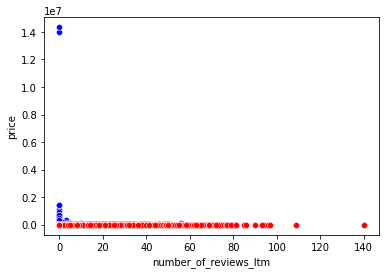

In [37]:
#Visualizamos la gráfica comparativa entre el Precio real y el precio predecido

sns.scatterplot(x='number_of_reviews_ltm', y='price', color="blue", data=dataframe)
sns.scatterplot(x='number_of_reviews_ltm', y='Predicciones', color="red", data=dataframe)

In [38]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indept, y=Vars_Dept)
coef_Deter4

0.0002868330800573915

In [39]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.016936147143237493

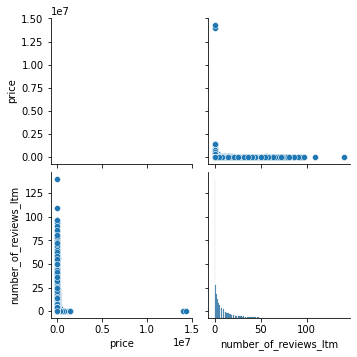

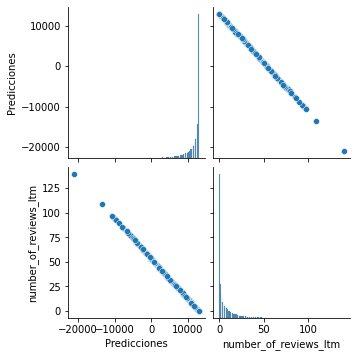

In [40]:
#Graficamos todas las dispersiones entre las variables "Predicción, "price" y "number_of_reviews_ltm"
sns.pairplot(dataframe[['price','number_of_reviews_ltm']])
sns.pairplot(dataframe[['Predicciones','number_of_reviews_ltm']])

##### MODELO DE PREDICCIÓN: "SEGUNDA VARIABLE CON MAYOR CORRELACIÓN" #####

In [52]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indept5= dataframe[['reviews_per_month']]
Vars_Dept5= dataframe['price']

In [53]:
#Se define model como la  de regresión lineal
from sklearn.linear_model import LinearRegression
import seaborn as sns
model5=LinearRegression()

In [54]:
type(model5)

sklearn.linear_model._base.LinearRegression

In [55]:
model5.fit(X=Vars_Indept5, y=Vars_Dept5)

LinearRegression()

In [56]:
model5.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2443.38816827]),
 'rank_': 1,
 'singular_': array([139.68210402]),
 'intercept_': 13948.032424883824}

$$
total= -2443.38816827 \cdot reviews_per_month + 13948.032424883824

$$

****************************MODELO PREDICTIVO 2***************************

In [59]:
#Predecimos los valores del precio a partir de la variable "reviews_per_month"
y_predict5= model5.predict(X=dataframe[['reviews_per_month']])
y_predict5

array([13361.6192645 , 12017.75577195, 13508.2225546 , ...,
       13043.97880263, 12872.94163085, 13092.84656599])

In [60]:
#Insertamos la columna de predicciones en el DataFrame
dataframe.insert(0, 'Predicciones_2', y_predict5)
dataframe

,Predicciones_2,Predicciones,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,13361.619265,12217.616490,0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.58184,-58.42415,Entire home/apt,9823,3,30,0.24,1,314,3
1,12017.755772,11003.385773,1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,MarÃ­a,Palermo,-34.58617,-58.41036,Entire home/apt,3728,7,98,0.79,3,324,8
2,13508.222555,11731.924203,2,118877,Entire Studio/apt in Buenos Aires,600320,Roxana,Palermo,-34.57734,-58.43790,Entire home/apt,5687,2,24,0.18,2,174,5
3,11260.305440,12946.154920,3,14711,SPECTACULAR ANCIENT HOUSE,57770,Cintia,San Nicolas,-34.60786,-58.37211,Entire home/apt,17370,1,0,1.10,1,365,0
4,13776.995253,12703.308776,4,120874,Great apt 1 Bedroom - 1.5 Bath /Recoleta,530261,Luciano,Recoleta,-34.58991,-58.39931,Entire home/apt,6514,14,10,0.07,27,295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17942,10014.177474,6875.001336,17942,32279620,Lumiere Place Puerto Madero,408551,Guille,Dique 2,-34.61684,-58.36386,Entire home/apt,9988,3,70,1.61,13,154,25
17943,13263.883738,12946.154920,17943,27460266,â¢â¢WELCOME! New Modern Suite Puerto Madero ...,183209971,Giselle,Dique 2,-34.61596,-58.36367,Entire home/apt,20265,3,11,0.28,15,78,0
17944,13043.978803,11974.770346,17944,46217105,âPUERTO MADERO LUXURIOUS APARTMENT â CasaB...,183209971,Giselle,Dique 2,-34.61459,-58.36378,Entire home/apt,26055,3,5,0.37,15,81,4
17945,12872.941631,11731.924203,17945,31262931,Puerto Madero Elegant Suite | CasaBAires,183209971,Giselle,Dique 3,-34.60776,-58.36477,Entire home/apt,20265,3,19,0.44,15,83,5


<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

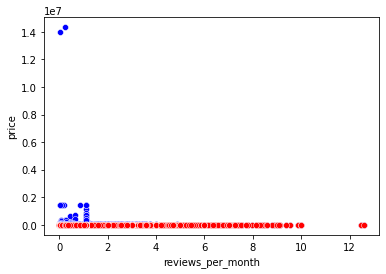

In [61]:
#Visualizamos la gráfica comparativa entre el Precio real y el precio predecido

sns.scatterplot(x='reviews_per_month', y='price', color="blue", data=dataframe)
sns.scatterplot(x='reviews_per_month', y='Predicciones_2', color="red", data=dataframe)

In [62]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indept5, y=Vars_Dept5)
coef_Deter5

0.0002701983070274583

In [63]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.016437709908240207

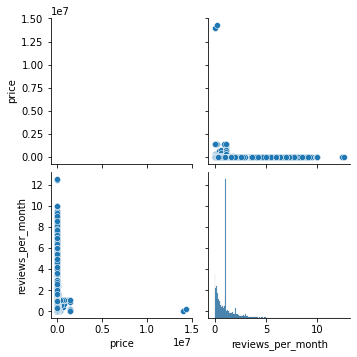

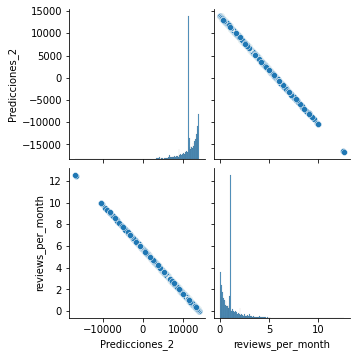

In [64]:
#Graficamos todas las dispersiones entre las variables "Predicción_2, "price" y "reviews_per_month"
sns.pairplot(dataframe[['price','reviews_per_month']])
sns.pairplot(dataframe[['Predicciones_2','reviews_per_month']])